In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from queue import Queue

colors = ["black","red","green","blue","yellow","pink","orange","purple","beige","brown","gray","cyan","magenta"]

In [2]:
class dbscan():
    def __init__(self,df, epsilon=1, min_points=5):
        self.df = df.to_numpy()
        self.epsilon = epsilon
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0
        self.n = self.df.shape[0]
        
    def fit(self):
        "Fit the data"
        
        # Create labels column initialized to -1 (unclassified)
        self.df = np.append(self.df, np.array([[-1]*self.n]).reshape(-1,1), axis=1)
        
        for i in range(self.n):
            
            # if the point is not labled already then search for neighbors
            if self.df[i,2] != -1:
                continue
            
            # find neighbors
            p = self.df[i,:2]
            neighbors = self.rangeQuery(p)
            
            # If less neighbors than min_points then label as noise and continue
            if len(neighbors) < self.min_points:
                self.df[i,2] = self.noise
                continue
                
            # increment cluster label
            self.cluster_label += 1

            # set current row to new cluster label
            self.df[i,2] = self.cluster_label

            # create seed set to hold all neighbors of cluster including the neighbors already found
            found_neighbors = neighbors
            
            # create Queue to fold all neighbors of cluster
            q = Queue()
            
            # add original neighbors
            for x in neighbors:
                q.put(x)
            
            # While isnt empty label new neighbors to cluster
            while not q.empty():
                
                current = q.get()
                
                # if cur_row labled noise then change to cluster label (border point)
                if self.df[current,2] == 0:
                    self.df[current,2] = self.cluster_label

                # If label is not -1(unclassified) then continue
                if self.df[current,2] != -1:
                    continue
                    
                # label the neighbor
                self.df[current,2] = self.cluster_label

                # look for neightbors of cur_row
                point = self.df[current,:2]
                neighbors2 = self.rangeQuery(point)
                
                # if neighbors2 >= min_points then add those neighbors to seed_set
                if len(neighbors2) >= self.min_points:

                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x)                           
    
    def rangeQuery(self, x):
        """Query database against x and return all points that are <= epsilon"""
        
        neighbors = []
        
        for j in range(self.n):
            q = self.df[j, :2]
            if self.dist(x, q) <= self.epsilon:
                neighbors.append(j)
        
        return neighbors
    
    def dist(self, point1, point2):
        """Euclid distance function"""
        
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1]
        
        # create the points 
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2

        return np.sqrt(p1 + p2)
    
    def show(self):
        labels = np.unique(self.df[:, 2])
        for label in range(len(labels)):
            cluster = self.df[self.df[:, 2] == label]
            plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[label])

In [3]:
def purity(labels, pred):
    print(len(labels[labels == pred]))
    return len(labels[labels == pred])/ len(labels)

In [4]:
data = pd.read_csv("q2-data/Compound.csv", sep='\t', header=None)
data.info()

obj = dbscan(data.iloc[:, 0:2], epsilon=1.5, min_points=3)
obj.fit()
print(obj.df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       399 non-null    float64
 1   1       399 non-null    float64
 2   2       399 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB
[[26.75 22.15  0.  ]
 [29.8  22.15  0.  ]
 [31.55 21.1   0.  ]
 ...
 [15.6   9.45  6.  ]
 [15.3   9.15  6.  ]
 [15.1   9.55  6.  ]]


270
purity is  0.6766917293233082


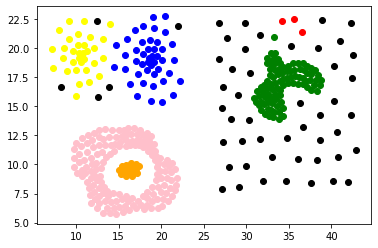

In [5]:
obj.show()
print("purity is ", purity(data.iloc[:, 2], obj.df[:, 2]))

In [6]:
data = pd.read_csv("q2-data/D31.csv", sep='\t', header=None)
data.info()

obj = dbscan(data.iloc[:, 0:2], epsilon=0.75, min_points=5)
obj.fit()
print(obj.df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3100 non-null   float64
 1   1       3100 non-null   float64
 2   2       3100 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 72.8 KB
[[25.0514  5.7475  1.    ]
 [26.6614  7.3414  1.    ]
 [25.2653  6.2466  1.    ]
 ...
 [ 5.276  17.2475  4.    ]
 [ 6.4444 16.2033  4.    ]
 [ 7.162  18.1836  4.    ]]


298
purity is  0.09612903225806452


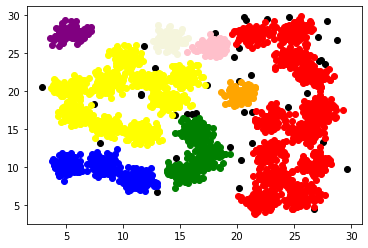

In [7]:
obj.show()
print("purity is ", purity(data.iloc[:, 2], obj.df[:, 2]))

In [20]:
data = pd.read_csv("q2-data/spiral.csv", sep='\t', header=None)
data.info()

obj = dbscan(data.iloc[:, 0:2], epsilon=2, min_points=5)
obj.fit()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       312 non-null    float64
 1   1       312 non-null    float64
 2   2       312 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.4 KB


0
purity is  0.0


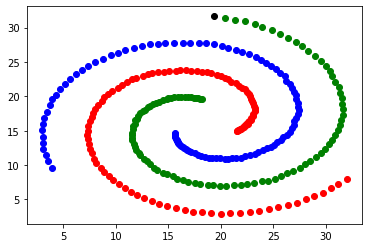

In [21]:
obj.show()
print("purity is ", purity(data.iloc[:, 2], obj.df[:, 2]))